# Importing libraries

## Basics

In [193]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import calendar

## Cross validation

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## Models

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Metrics

In [51]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import roc_auc_score as auc_score
from sklearn.metrics import accuracy_score

# Exploratory data analysis

In [52]:
gtd = pd.read_excel("globalterrorismdb_0617dist.xlsx")

In [53]:
gtd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(53), int64(24), object(57)
memory usage: 175.5+ MB


In [54]:
gtd.dtypes.sort_values()

eventid               int64
targtype1             int64
property              int64
weaptype1             int64
attacktype1           int64
suicide               int64
success               int64
multiple              int64
doubtterr             int64
crit3                 int64
crit2                 int64
vicinity              int64
crit1                 int64
INT_IDEO              int64
individual            int64
iyear                 int64
imonth                int64
INT_ANY               int64
region                int64
INT_LOG               int64
country               int64
iday                  int64
extended              int64
INT_MISC              int64
weapsubtype3        float64
weaptype3           float64
weapsubtype2        float64
weaptype2           float64
weapsubtype1        float64
nperpcap            float64
                     ...   
gname2               object
gsubname             object
gname                object
natlty3_txt          object
target3             

## Attribute categories

Based on the GTD Codebook (adjusted with own analysis), the dataset consists of the following attribute groups:
1. Time
2. Location
3. Incident
4. Attack
5. Perpetrators
6. Perpetrator validity
7. Weapon
8. Target
9. Casualties and consequences
10. Additional information

In [55]:
att_time = ['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution']
att_loc = ['country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity','vicinity', 'location']
att_incid = ['summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'related']
att_attack = ['success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt']
att_perp = ['gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3']
att_perval = ['motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim']
att_weap = ['weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt', 'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt', 'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt', 'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt', 'weapdetail']
att_targ = ['targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt']
att_cons = ['nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property', 'propextent', 'propextent_txt', 'propvalue', 'propcomment', 'ishostkid', 'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransom', 'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus', 'ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt', 'nreleased']
att_info = ['addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY',]

From among these the `att_perp` columns contains the target variable(s).

## Perpetrator names

In [56]:
gtd[att_perp].sample(10)

,gname,gsubname,gname2,gsubname2,gname3,gsubname3
61985,Unknown,NaN,NaN,NaN,NaN,NaN
115291,Unknown,NaN,NaN,NaN,NaN,NaN
139394,Unknown,NaN,NaN,NaN,NaN,NaN
155356,Hadramawt Province of the Islamic State,NaN,Al-Qaida in the Arabian Peninsula (AQAP),NaN,NaN,NaN
127024,Unknown,NaN,NaN,NaN,NaN,NaN
159738,Islamic State of Iraq and the Levant (ISIL),NaN,NaN,NaN,NaN,NaN
124651,Unknown,NaN,NaN,NaN,NaN,NaN
14460,Unknown,NaN,NaN,NaN,NaN,NaN
89679,Unknown,NaN,NaN,NaN,NaN,NaN
107618,Corsican National Liberation Front (FLNC),NaN,NaN,NaN,NaN,NaN


In [57]:
gtd[att_perp].describe()

,gname,gsubname,gname2,gsubname2,gname3,gsubname3
count,170350,5191,1740,149,269,13
unique,3454,1098,383,58,103,13
top,Unknown,Militants,Al-Nusrah Front,The Family,National Democratic Alliance Army (NDAA-ESSA),Turkistan Islamic Party (Syria)
freq,78306,480,56,20,15,1


### Suspected perpetrators

A substantial amount of perpetrator information is in a 'suspected' status.

In [58]:
gtd.loc[:,['guncertain1','guncertain2','guncertain3']].describe()

,guncertain1,guncertain2,guncertain3
count,169971.000000,1681.000000,265.000000
mean,0.084356,0.264723,0.184906
std,0.277921,0.441317,0.388956
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


On the other hand, the coding is confusing here because it is not clear what does the lack of 'certainty' information means compared to the '0' values.

In [59]:
gtd.loc[:,['guncertain1','guncertain2','guncertain3']].fillna(value=0.0).describe()

,guncertain1,guncertain2,guncertain3
count,170350.000000,170350.000000,170350.000000
mean,0.084168,0.002612,0.000288
std,0.277640,0.051044,0.016958
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


### Number of incidents per groups

More than 45% of the  perpetrators are unknown.

In [60]:
gtd.gname.value_counts(normalize=True).head(1)

Unknown    0.459677
Name: gname, dtype: float64

While there are 3454 groups, more than half of them is responsible only for one single incident.

In [61]:
len(gtd.gname.value_counts()[gtd.gname.value_counts() <= 1])

1693

Less than 23% of the groups are responsible for 95% of all the incidents.

In [62]:
inc_grp_csum = gtd[gtd.gname != 'Unknown'].gname.value_counts(normalize=True).cumsum()
inc_grp_csum

Taliban                                                                                                             0.071433
Shining Path (SL)                                                                                                   0.120877
Islamic State of Iraq and the Levant (ISIL)                                                                         0.167453
Farabundo Marti National Liberation Front (FMLN)                                                                    0.203859
Al-Shabaab                                                                                                          0.233008
Irish Republican Army (IRA)                                                                                         0.262005
Revolutionary Armed Forces of Colombia (FARC)                                                                       0.288960
New People's Army (NPA)                                                                                             0.315186


In [63]:
len(inc_grp_csum[inc_grp_csum <= 0.95]) / len(gtd.gname.unique())

0.22379849449913145

### Second and third groups

In [64]:
additional_names = gtd.loc[:, ['gname2', 'gname3']].dropna(how='all').groupby(by=gtd.loc[:,'gname']).count()

In [65]:
additional_names.sort_values(by='gname2', ascending=False)

,gname2,gname3
gname,,
Taliban,72,5
Al-Nusrah Front,71,28
Revolutionary Armed Forces of Colombia (FARC),66,0
Tehrik-i-Taliban Pakistan (TTP),66,10
Asa'ib Ahl al-Haqq,54,0
Islamic State of Iraq and the Levant (ISIL),52,5
Hamas (Islamic Resistance Movement),36,4
Al-Aqsa Martyrs Brigade,33,7
Lashkar-e-Taiba (LeT),32,8


### Subnames

In [66]:
sub_names = gtd.loc[:,'gsubname'].dropna().groupby(by=gtd.loc[:,'gname']).count()

In [67]:
sub_names.sort_values(ascending=False)

gname
Farabundo Marti National Liberation Front (FMLN)            526
Sikh Extremists                                             412
Revolutionary Armed Forces of Colombia (FARC)               399
New People's Army (NPA)                                     241
Islamic State of Iraq and the Levant (ISIL)                 224
Tehrik-i-Taliban Pakistan (TTP)                             159
Tamils                                                      147
Kurdistan Workers' Party (PKK)                              141
Hezbollah                                                   117
United Popular Action Movement                              103
Hutu extremists                                             102
Chechen Rebels                                               97
Islamist extremists                                          97
Communist Party of India - Maoist (CPI-Maoist)               96
Opposition Group                                             90
Al-Qaida in the Arabian Peninsula 

### Unaffiliated individuals

The ratio of unaffiliated individuals is 0.2%

In [68]:
gtd.individual.value_counts().iloc[1] / len(gtd)

0.0024831229820956855

There are 314 cases where the perpetrator is an unaffiliated individual but somehow also connected to a vague, broadly defined group:

In [69]:
gtd.gname[(gtd.individual == 1) & (gtd.gname != "Unknown")].value_counts()

Jihadi-inspired extremists       64
Anti-Government extremists       34
White extremists                 30
Anti-Abortion extremists         28
Anti-Muslim extremists           24
Muslim extremists                23
Anti-Semitic extremists          16
Anti-Technology extremists       14
Anti-Police extremists           10
Anti-Nuclear extremists           8
Right-wing extremists             5
Marxists                          4
Iraqi extremists                  4
Anti-Gun Control extremists       3
Anti-Immigrant extremists         3
Animal Rights extremists          2
Neo-Nazi extremists               2
Anti-Israeli extremists           2
Anti-United States extremists     2
Iranian extremists                2
Turkish radicals                  2
Anti-White extremists             2
Environmentalists                 2
Gaddafi loyalists                 1
Supporters of Charles Manson      1
Supporters of Saddam Hussein      1
Anti-Environmentalists            1
Anti-Park extremists        

## Missing values

From among the total 135 attributes 104 contains missing values. From among these, 75% miss more than 40% of their values.

In [70]:
def missing_ratio(data):
    """
    Lists missing values ratios for each column in a dataset.
    
    Takes `data`, dataset.
    
    Returns the `mrat` dataframe, which lists the columns and their corresponding missing value ratios in descending order.
    """
    mrat = data.isnull().mean()[data.isnull().any() == True]
    mrat = mrat.sort_values(ascending=False)
    return mrat

In [71]:
misrat_gtd = missing_ratio(gtd)
misrat_gtd.head()

gsubname3           0.999924
weapsubtype4_txt    0.999583
weapsubtype4        0.999583
weaptype4           0.999566
weaptype4_txt       0.999566
dtype: float64

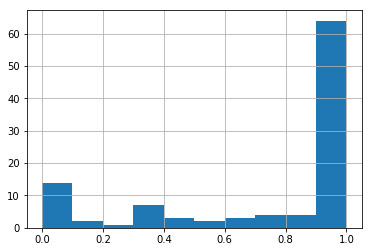

In [72]:
misrat_gtd.hist()

## Correlated attributes

In [73]:
corrs = gtd.corr()
corrs

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.006579,0.015797,0.090726,-0.138450,0.402518,0.171345,0.553012,0.029614,...,-0.006867,-0.013978,-0.177160,-0.165084,0.276580,-0.215808,-0.161964,-0.152490,-0.077708,-0.193944
iyear,0.999996,1.000000,0.003989,0.015718,0.090716,-0.138433,0.402530,0.171396,0.553031,0.029603,...,-0.006859,-0.014248,-0.177193,-0.165045,0.276577,-0.215725,-0.161970,-0.152497,-0.077702,-0.193941
imonth,0.006579,0.003989,1.000000,0.004970,0.000017,-0.007392,-0.001067,-0.015723,-0.004085,0.002018,...,-0.000940,0.057769,0.000127,-0.017220,0.012434,-0.023320,-0.001348,-0.000668,-0.003443,-0.005439
iday,0.015797,0.015718,0.004970,1.000000,-0.004475,0.004255,0.009347,0.002978,0.010984,-0.009472,...,0.015000,0.004007,0.002760,-0.006437,-0.001443,0.006836,-0.002149,-0.002180,-0.002295,-0.001582
extended,0.090726,0.090716,0.000017,-0.004475,1.000000,-0.021913,0.035899,-0.021142,0.036189,0.056203,...,-0.007422,0.027223,-0.054613,0.013042,0.211536,-0.206767,0.069081,0.072660,0.029269,0.079923
country,-0.138450,-0.138433,-0.007392,0.004255,-0.021913,1.000000,0.150094,0.194744,-0.006076,-0.085085,...,0.008464,0.037523,-0.076038,-0.043273,0.024641,-0.059509,0.075912,0.073553,0.208986,0.160484
region,0.402518,0.402530,-0.001067,0.009347,0.035899,0.150094,1.000000,0.324760,0.427534,-0.087536,...,0.028269,0.069405,-0.058334,-0.079023,0.199129,-0.167922,-0.092285,-0.082554,0.043994,-0.055757
latitude,0.171345,0.171396,-0.015723,0.002978,-0.021142,0.194744,0.324760,1.000000,0.272843,-0.020673,...,0.060100,0.060315,-0.059112,0.042666,0.055016,0.010813,-0.099850,-0.095214,0.100130,-0.040346
longitude,0.553012,0.553031,-0.004085,0.010984,0.036189,-0.006076,0.427534,0.272843,1.000000,0.108241,...,0.003589,-0.026406,-0.129262,-0.128182,0.102898,-0.027429,-0.150094,-0.145233,-0.035335,-0.157403
specificity,0.029614,0.029603,0.002018,-0.009472,0.056203,-0.085085,-0.087536,-0.020673,0.108241,1.000000,...,-0.015830,-0.001936,-0.064442,-0.045851,0.023540,-0.028324,0.072738,0.071185,-0.020790,0.060447


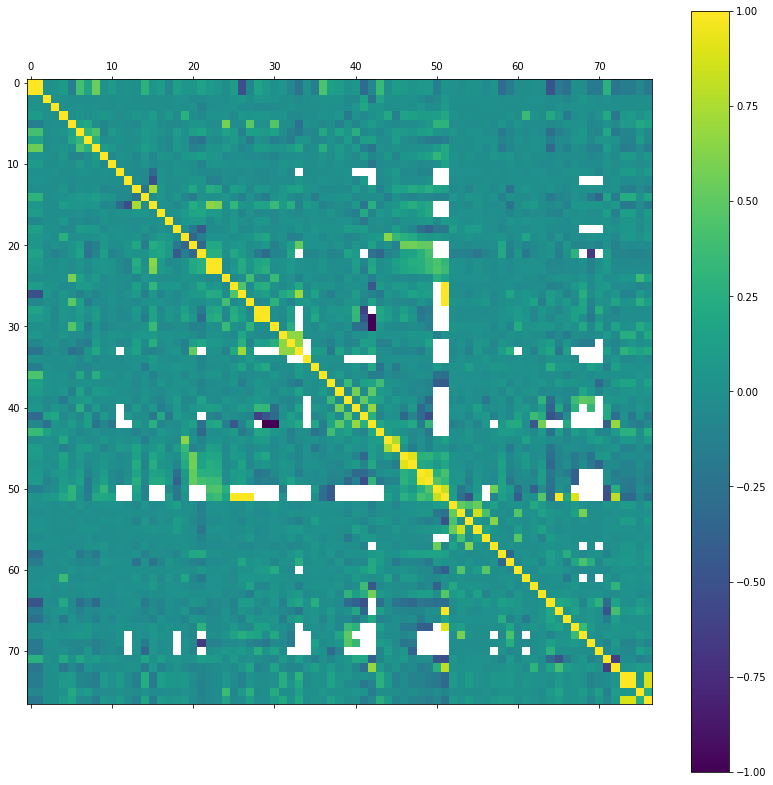

In [74]:
fig = pyplot.figure(figsize=(14,14))
ax = fig.add_subplot(111)
cax = ax.matshow(corrs, vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

In [75]:
cri_hi = abs(corrs < 1) & abs(corrs >= 0.6)
corr_hi = corrs[cri_hi].stack()
corr_hi

eventid       iyear           0.999996
iyear         eventid         0.999996
crit3         alternative     0.735848
alternative   crit3           0.735848
              targtype1       0.651480
              targsubtype1    0.609517
attacktype1   weaptype1       0.650027
targtype1     alternative     0.651480
              targsubtype1    0.987815
targsubtype1  alternative     0.609517
              targtype1       0.987815
targsubtype2  guncertain3     0.705175
targtype3     targsubtype3    0.977081
targsubtype3  targtype3       0.977081
guncertain1   guncertain2     0.662324
              guncertain3     0.669507
guncertain2   guncertain1     0.662324
              guncertain3     0.671354
guncertain3   targsubtype2    0.705175
              guncertain1     0.669507
              guncertain2     0.671354
claimmode2    claimmode3      0.685674
claimmode3    claimmode2      0.685674
              nreleased       0.680160
weaptype1     attacktype1     0.650027
              weapsubtype

## Skews

In [76]:
skews = gtd.skew()
abs(skews).sort_values(ascending=False)

nkillus           215.839494
nwoundus          200.667158
nwound            161.587032
propvalue         140.139079
nhostkid           59.090291
nwoundte           55.179529
nkill              54.322209
nperps             51.912519
nkillter           44.572000
ransomamt          27.141755
ransomamtus        20.751570
individual         19.993204
ransompaidus       12.863891
ishostkid          12.652856
nhostkidus         12.619410
crit2              11.813629
ransompaid         11.258526
INT_MISC           10.391977
crit1               9.139429
nhours              7.869394
ndays               7.593642
ransom              7.161252
claimed             6.925155
claim2              6.914794
nperpcap            6.794189
suicide             5.153535
extended            4.468114
natlty2             4.373062
vicinity            4.301479
natlty3             4.161542
                     ...    
targsubtype2        1.057420
compclaim           1.002275
latitude            0.958365
weaptype3     

# Data preprocessing

In the first round, we preprocess the data to create a viable minimum set, on which we start model testing. This consists of the following steps:
1. Dropping special attributes
* Excluding incidents with 'unknown' perpetrators
* Excluding 'unaffiliated' individuals
* Excluding the ambiguous cases
* Including only general names and only of the primary perpetrators (i.e. `gname`)
* Dropping all missing values
* Including only numerical values
* Excluding data before 2012
* Including only the top perpetrators responsible for 95% of total incidents

In [77]:
gtd_preproc = gtd

## Dropping special attributes

The special attributes of the dataset:
* eventid
* addnotes
* scite1
* scite2
* scite3
* dbsource



In [156]:
def preproc(data, spec=True, period=(1, 4)):
    """
    Cleans and preprocesses dataset.
    
    Parameters:
    ===========
    
    `spec`: boolean, True
    Drops special attributes.
    
    `period`: tuple, ()
    Defines shown periods with the help of the following dates:
        '1': 1970
        '2': 1998
        '3': April 1 2008
        '4': 2012
        `5`: 2016
    
    """
    procd = data.copy(deep=True)
    
    # Dropping special attributes
    if spec == True:
        procd.drop(['eventid', 'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource'], axis=1, inplace=True)

    # Selecting for a particular period
    dates = [1970, 1997, 2008, 2012, 2016]
    
    predmin = dates[period[0]-1]
    predmax = dates[period[1]-1]
    
    procd = procd[(procd.iyear >= predmin) & (procd.iyear < predmax + 1)]
        
    print("predmin: {}".format(predmin) )
    print("predmax: {}".format(predmax))
    return procd

In [157]:
print("gtd:\n")
print(gtd.shape)

gtd_preproc = gtd

print("\dat_prep:\n")
dat_prep = preproc(gtd_preproc, period=(4,5))
print(dat_prep.shape)

print("\ngtd_preproc:\n")
gtd_preproc = gtd_preproc.drop(['eventid', 'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource'], axis=1)
gtd_preproc = gtd_preproc[gtd_preproc.iyear >= 2012]
gtd_preproc.info()

gtd:

(170350, 135)
\dat_prep:

predmin: 2012
predmax: 2016
(65696, 129)

gtd_preproc:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65696 entries, 104654 to 170349
Columns: 129 entries, iyear to related
dtypes: datetime64[ns](1), float64(53), int64(23), object(52)
memory usage: 65.2+ MB


In [209]:
# test = gtd[(gtd.iyear >= 2008) & (gtd.imonth >= 3) & (gtd.iyear < 2016) & (gtd.imonth < 13)]
# test = gtd[(gtd.iyear >= 1970) & (gtd.imonth >= 1) & (gtd.iyear < 2008) & (gtd.imonth < 7)]

test = gtd
print(min(test.eventid))
print(max(test.eventid))


# dt = pd.to_datetime(test[['iyear', 'imonth', 'iday']].rename(columns = {'iyear': 'year', 'imonth': 'month', 'iday': 'day'}))
# dt.head()

def randomdate(year, month):
    dates = calendar.Calendar().itermonthdates(year, month)
    return np.random.choice([date for date in dates if date.month == month])


test.iday.describe()

test[['iyear','imonth','iday']][test.iday == 0]

#test.iday[test.iday == 0].apply(np.randint())
#test.iday[test.iday == 0]



197000000001
201701270001


,iyear,imonth,iday
1,1970,0,0
2,1970,1,0
3,1970,1,0
4,1970,1,0
96,1970,3,0
165,1970,4,0
244,1970,5,0
245,1970,5,0
377,1970,7,0
378,1970,7,0


## Excluding data from before 2012

## Excluding unknown groups

In [82]:
# gtd_preproc = gtd_preproc[gtd_preproc.gname != 'Unknown']

## Dropping unaffiliated individuals

We exclude those cases, where the perpetrator is identified but not know to be affiliated to a group.

In [83]:
# gtd_preproc = gtd_preproc[gtd_preproc.individual != 1]

## Dropping uncertain cases

In [84]:
# gtd_preproc = gtd_preproc[(gtd_preproc.guncertain1 != 1) |
#                          (gtd_preproc.guncertain2 != 1) |
#                          (gtd_preproc.guncertain3 != 1)]

## Including only groups responsible for the 95% of incidents

In [85]:
gtd_preproc.gname.value_counts()[gtd_preproc.gname.value_counts(normalize=True).cumsum() <= 0.95]

Unknown                                                  78306
Taliban                                                   6575
Shining Path (SL)                                         4551
Islamic State of Iraq and the Levant (ISIL)               4287
Farabundo Marti National Liberation Front (FMLN)          3351
Al-Shabaab                                                2683
Irish Republican Army (IRA)                               2669
Revolutionary Armed Forces of Colombia (FARC)             2481
New People's Army (NPA)                                   2414
Kurdistan Workers' Party (PKK)                            2152
Boko Haram                                                2077
Basque Fatherland and Freedom (ETA)                       2024
Communist Party of India - Maoist (CPI-Maoist)            1766
Liberation Tigers of Tamil Eelam (LTTE)                   1606
National Liberation Army of Colombia (ELN)                1483
Maoists                                                

In [86]:
tempname = gtd_preproc.gname
idx_main_groups = tempname.value_counts()[tempname.value_counts(normalize=True).cumsum() <= 0.95].index

In [87]:
# gtd_preproc = gtd_preproc[gtd_preproc.gname.isin(idx_main_groups)]

## Dropping additional perpetrators and subnames

In [88]:
gtd_preproc = gtd_preproc.drop(['gsubname','gname2','gsubname2','gname3','gsubname3'], axis=1)

## Dropping categorical attributes

In [89]:
idx_nonobj = gtd_preproc.dtypes[(gtd_preproc.dtypes.index == 'gname') | (gtd_preproc.dtypes != 'object')].index
idx_nonobj

Index(['iyear', 'imonth', 'iday', 'extended', 'resolution', 'country',
       'region', 'latitude', 'longitude', 'specificity', 'vicinity', 'crit1',
       'crit2', 'crit3', 'doubtterr', 'alternative', 'multiple', 'success',
       'suicide', 'attacktype1', 'attacktype2', 'attacktype3', 'targtype1',
       'targsubtype1', 'natlty1', 'targtype2', 'targsubtype2', 'natlty2',
       'targtype3', 'targsubtype3', 'natlty3', 'gname', 'guncertain1',
       'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap',
       'claimed', 'claimmode', 'claim2', 'claimmode2', 'claim3', 'claimmode3',
       'compclaim', 'weaptype1', 'weapsubtype1', 'weaptype2', 'weapsubtype2',
       'weaptype3', 'weapsubtype3', 'weaptype4', 'weapsubtype4', 'nkill',
       'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property',
       'propextent', 'propvalue', 'ishostkid', 'nhostkid', 'nhostkidus',
       'nhours', 'ndays', 'ransom', 'ransomamt', 'ransomamtus', 'ransompaid',
       'ransompaidus', 

In [90]:
gtd_preproc = gtd_preproc.reindex(idx_nonobj, axis=1)

## Dropping missing values

In [91]:
gtd_preproc = gtd_preproc.dropna(axis=1, thresh=0.05 * gtd.shape[1])

## Dropping correlated attributes

In [92]:
corr_preproc = gtd_preproc.corr()
cri_hi_prep = abs(corr_preproc < 1) & abs(corr_preproc >= 0.6)
atts_corr = corr_preproc[cri_hi_prep].stack()
atts_corr

crit3         alternative     0.735848
alternative   crit3           0.735848
              targtype1       0.651480
              targsubtype1    0.609517
attacktype1   weaptype1       0.650027
targtype1     alternative     0.651480
              targsubtype1    0.987815
targsubtype1  alternative     0.609517
              targtype1       0.987815
targsubtype2  guncertain3     0.705175
targtype3     targsubtype3    0.977081
targsubtype3  targtype3       0.977081
guncertain1   guncertain2     0.662324
              guncertain3     0.669507
guncertain2   guncertain1     0.662324
              guncertain3     0.671354
guncertain3   targsubtype2    0.705175
              guncertain1     0.669507
              guncertain2     0.671354
claimmode2    claimmode3      0.685674
claimmode3    claimmode2      0.685674
              nreleased       0.680160
weaptype1     attacktype1     0.650027
              weapsubtype1    0.754360
weapsubtype1  weaptype1       0.754360
weaptype2     weapsubtype

In [93]:
gtd_preproc = gtd_preproc.drop(['weaptype1', 'INT_LOG', 'INT_IDEO'], axis=1)

## The characteristics of the preprocessed dataset

In [94]:
gtd_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Data columns (total 75 columns):
iyear             170350 non-null int64
imonth            170350 non-null int64
iday              170350 non-null int64
extended          170350 non-null int64
resolution        2219 non-null datetime64[ns]
country           170350 non-null int64
region            170350 non-null int64
latitude          165744 non-null float64
longitude         165744 non-null float64
specificity       170346 non-null float64
vicinity          170350 non-null int64
crit1             170350 non-null int64
crit2             170350 non-null int64
crit3             170350 non-null int64
doubtterr         170350 non-null int64
alternative       26631 non-null float64
multiple          170350 non-null int64
success           170350 non-null int64
suicide           170350 non-null int64
attacktype1       170350 non-null int64
attacktype2       5630 non-null float64
attacktype3       374 non-null floa

# Modeling

In [95]:
X = gtd_preproc.drop('gname', axis=1)

In [96]:
y = gtd_preproc.gname

In [97]:
validation_size = 0.2
seed = 17

In [98]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [99]:
print(X_train.shape)
print(X_validation.shape)
print(Y_train.shape)
print(Y_validation.shape)

(136280, 74)
(34070, 74)
(136280,)
(34070,)


In [100]:
results = []
names = []

## Decisions tree

In [101]:
kfold = KFold(n_splits=10, random_state=seed)

In [102]:
cv_results = cross_val_score(DecisionTreeClassifier(), X_train, Y_train, cv=kfold, scoring='accuracy')

TypeError: float() argument must be a string or a number, not 'NaTType'

In [ ]:
print("Results: \n{})".format(cv_results))
print("\nMean: {}".format(cv_results.mean()))
print("STD: {}".format(cv_results.std()))

## Linear Discriminant Analysis

In [ ]:
cv_results = cross_val_score(LinearDiscriminantAnalysis(), X_train, Y_train, cv=kfold, scoring='accuracy')

In [ ]:
print("Results: \n{})".format(cv_results))
print("\nMean: {}".format(cv_results.mean()))
print("STD: {}".format(cv_results.std()))

## K Neighbors Classifier

In [ ]:
cv_results = cross_val_score(KNeighborsClassifier(), X_train, Y_train, cv=kfold, scoring='accuracy')

In [ ]:
print("Results: \n{})".format(cv_results))
print("\nMean: {}".format(cv_results.mean()))
print("STD: {}".format(cv_results.std()))

## Logistic Regression
This proved to be relatively slow to execute.

In [ ]:
#cv_results = cross_val_score(LogisticRegression(), X_train, Y_train, cv=kfold, scoring='accuracy')

In [ ]:
#print("Results: \n{})".format(cv_results))
#print("\nMean: {}".format(cv_results.mean()))
#print("STD: {}".format(cv_results.std()))